In [9]:
from pprint import pprint
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
font = {'size'   : 18}

matplotlib.rc('font', **font)

In [10]:
plateinfo_path=r'/Volumes/GoogleDrive/My Drive/ELISAarrayReader/images_scienion/2020-03-30-15-08-05-COVD_March25_fluplatetest_AdamsPlate/PlateInfoFLuplate.csv'
antigenOD_path=r'/Volumes/GoogleDrive/My Drive/ELISAarrayReader/images_scienion/2020-03-30-15-08-05-COVD_March25_fluplatetest_AdamsPlate/2020-03-31-12-07-21-COVID_March31_fluanalysis_ODSummary.xlsx'
intensityBG_path=r'/Volumes/GoogleDrive/My Drive/ELISAarrayReader/images_scienion/2020-03-30-15-08-05-COVD_March25_fluplatetest_AdamsPlate/2020-03-31-12-07-21-COVID_March31_fluanalysis4.xlsx'

In [16]:
row_label=['A','B','C','D','E','F','G','H'] #Change these for scienion formats
col_label=[str(idx) for idx in np.arange(12)+1]
#antigenOD=np.empty((8,12,6,6)) # 96 wells, 6 antigen rows, 8 antigen columns
wellID=np.empty((8,12),dtype=object)


In [20]:
# Read all wells into dictionary. 
intensityBG_df = pd.DataFrame()
for r in np.arange(8):
    for c in np.arange(12):
        well_key = row_label[r]+col_label[c]
        OD_1_well_df = pd.read_excel(intensityBG_path, sheet_name=well_key, index_col=0)
        #OD_1_well_df = OD_1_well_df.unstack().reset_index(name='OD') # unpivot (linearize) the table
        #OD_1_well_df.rename(columns={'level_0': 'antigen_row', 'level_1': 'antigen_col'}, inplace=True)
        OD_1_well_df['well_id'] = well_key
        wellID[r,c] = well_key
        intensityBG_df = intensityBG_df.append(OD_1_well_df, ignore_index=True)
intensityBG_df

,X [µm],Y [µm],Result,"Intensity (median, background corrected) [AU]",Analyte level (median) [U/ml],Diameter [µm],Area [µm²],Saturation,Mean,Median,StdDev,Min,Max,Background Mean,Background Median,Background StdDev,Background Min,Background Max,well_id
0,2755.0,3956.0,Positive,59.466,NaN,233.0,42589.0,0.0,160.781,148.720,34.616,108.953,248.292,95.626,89.254,16.976,82.577,151.794,A1
1,3153.0,3931.0,Positive,112.558,NaN,143.0,16012.0,0.0,194.772,199.917,33.804,126.249,246.914,94.326,87.358,12.888,81.791,128.467,A1
2,3556.0,3934.0,Positive,112.848,NaN,145.0,16539.0,0.0,191.338,198.406,32.477,124.199,238.888,91.708,85.558,11.255,81.544,126.790,A1
3,3962.0,3935.0,Positive,109.533,NaN,147.0,16995.0,0.0,192.309,194.254,35.239,120.929,247.629,85.104,84.721,2.240,80.616,94.365,A1
4,2748.0,4272.0,Positive,81.453,NaN,208.0,34141.0,0.0,176.656,168.885,34.582,117.669,237.894,95.478,87.432,18.151,82.174,155.544,A1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2875,4823.0,5534.0,Borderline,9.046,NaN,141.0,15554.0,0.0,84.750,85.148,3.176,77.757,91.862,76.442,76.102,2.686,70.035,91.705,H12
2876,3159.0,5952.0,Negative,0.250,NaN,200.0,31382.0,0.0,76.534,76.483,1.947,71.286,86.964,76.234,76.232,1.610,71.035,81.466,H12
2877,3564.0,5952.0,Negative,0.000,NaN,200.0,31382.0,0.0,75.350,75.400,1.593,70.677,79.472,75.603,75.608,1.613,71.072,80.711,H12
2878,3802.0,6081.0,Negative,2.964,NaN,101.0,7980.0,0.0,78.903,78.159,4.434,72.645,96.834,75.267,75.195,1.727,70.114,81.216,H12


In [23]:

intensityBGTrimmed_df = intensityBG_df.filter(['Intensity (median, background corrected) [AU]', 'Mean', 'Median', 'Background Mean', 'Background Median', 'well_id'])
intensityBGTrimmed_df

,"Intensity (median, background corrected) [AU]",Mean,Median,Background Mean,Background Median,well_id
0,59.466,160.781,148.720,95.626,89.254,A1
1,112.558,194.772,199.917,94.326,87.358,A1
2,112.848,191.338,198.406,91.708,85.558,A1
3,109.533,192.309,194.254,85.104,84.721,A1
4,81.453,176.656,168.885,95.478,87.432,A1
...,...,...,...,...,...,...
2875,9.046,84.750,85.148,76.442,76.102,H12
2876,0.250,76.534,76.483,76.234,76.232,H12
2877,0.000,75.350,75.400,75.603,75.608,H12
2878,2.964,78.903,78.159,75.267,75.195,H12


## Below is for analysis of Scienion files. Above is for generating plots for AU/OD comparison.

In [17]:
plateinfo_dataframe=pd.read_csv(plateinfo_path)
plateinfo=plateinfo_dataframe.to_numpy()
#pprint(platinfo)
sera=plateinfo[0:12,1]
antigens=np.array(['Flu vaccine 2018-2019','HA H1','HA H3','HA H7','HA FluB I','HA FluB II'])
# Concentrations go up by rows which occur every 12th index.
pprint(plateinfo[0:5,:])
pprint(plateinfo[1::12,3])  # index into concentraitons for sera#12


array([['A1', 'HumanReferencePlasma', 'Control', 1.0],
       ['A2', 'anti-HA mAb MEDI8852', 'Control', 1.0],
       ['A3', 'antii-HA mAb TF19', 'Control', 1.0],
       ['A4', 'MS-Day0', 'Diagnostic', 0.001],
       ['A5', 'MS-Day7', 'Diagnostic', 0.001]], dtype=object)
array([1.0, 0.25, 0.0625, 0.015625, 0.00390625, 0.000976563,
       0.00024414099999999997, 6.1e-05], dtype=object)


# Sort ODs in antigen x dilutions x sera format.


In [18]:
# Read OD from Scienion outputs.
ODscienion_dataframe=pd.read_excel(antigenOD_path, sheet_name='ODs')
ODscienion=np.array(ODscienion_dataframe.to_numpy()[:,1:]) 

ODsortedBySera=ODscienion.reshape(6,8,12)
pprint(ODsortedBySera[0,0:8,0]) # check against the excel sheet A1,B1,C1,...,H1
pprint(ODsortedBySera[0,0,0:12])# check against the excel sheet A1,A2,...,A12


array([98.601, 49.44, 35.474, 13.635, 6.235, 5.79, 2.31, 0.607],
      dtype=object)
array([98.601, 120.846, 132.974, 68.609, 92.476, 96.389, 84.169, 65.057,
       48.826, 59.356, 58.276, 0.037], dtype=object)


In [19]:
# Construct array of concentraitons dilution x sera format
concentrations=np.zeros((8,12))
for n in range(len(sera)):
    concentrations[:,n] = plateinfo[n::12,3]
pprint(concentrations[:,1])

array([1.00000e+00, 2.50000e-01, 6.25000e-02, 1.56250e-02, 3.90625e-03,
       9.76563e-04, 2.44141e-04, 6.10000e-05])


## Visualize serum response vs dilutions per antigen

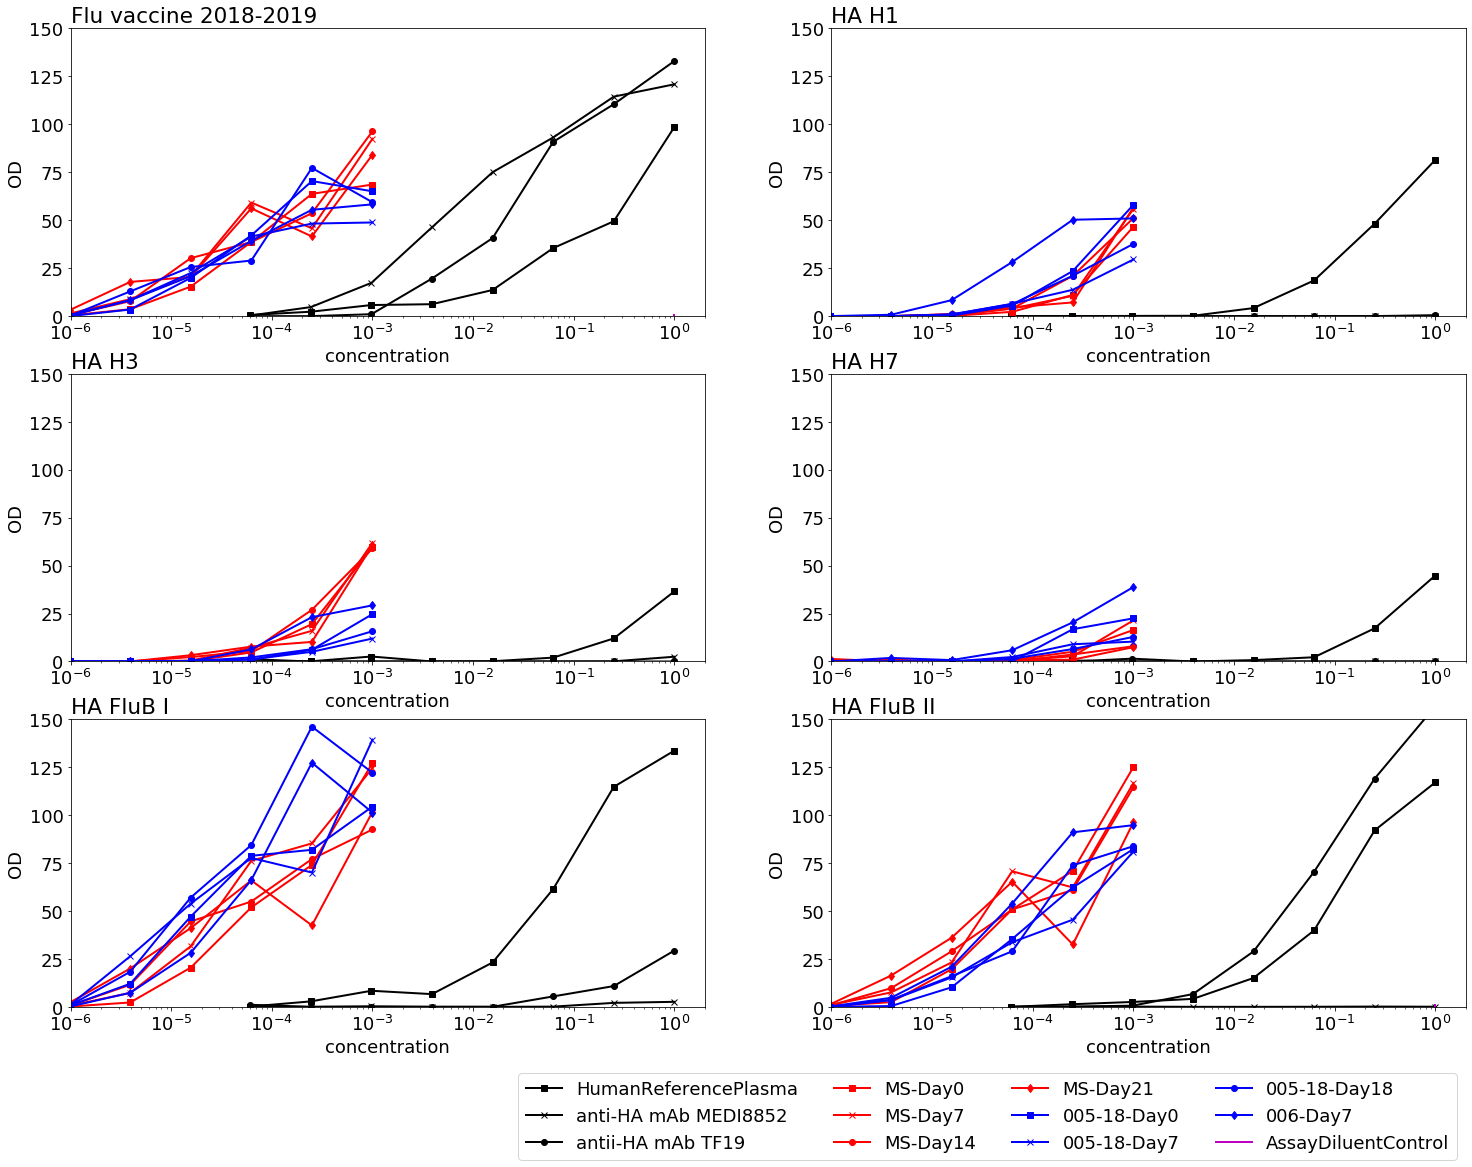

In [20]:
fig, ax = plt.subplots(3,int(len(antigens)/3), figsize=(25,18))
linestyle=['ks-','kx-','ko-','rs-','rx-','ro-','rd-','bs-','bx-','bo-','bd-','m-']
ax = ax.flatten()
for a in range(len(antigens)):
    for s in range(len(sera)):
        OD= np.array(ODsortedBySera[a,:,s], dtype='float')
        OD=np.flipud(np.squeeze(OD))
        conc=np.flipud(np.squeeze(concentrations[:,s]))
        ax[a].semilogx(conc,OD,linestyle[s],lw=2)
        ax[a].set_ylim([0,150])
        ax[a].set_xlim([1E-6,2])
        
        ax[a].set_title(antigens[a],loc='left');
        ax[a].set_ylabel('OD')
        ax[a].set_xlabel('concentration')
ax[a].legend(sera,bbox_to_anchor=(1, -0.2), loc='best', ncol=4)
plt.savefig('ODvsConcentrationPerAb.png')

## Visualize antigen binding vs dilution/ per serum

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

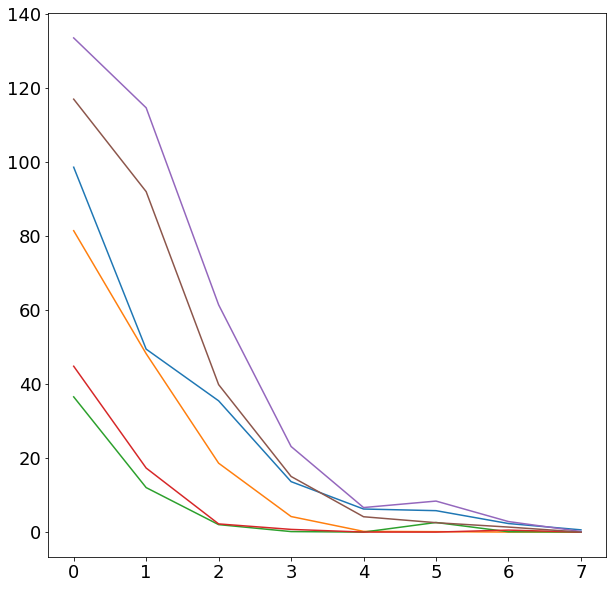

In [21]:
for s in sera:
    ODantigen= np.array(ODsortedBySera[:,:,sera == s], dtype='float')
    ODvsDilutions=np.transpose(np.squeeze(ODantigen))
    plt.figure(figsize=(10,10))
    plt.plot(ODvsDilutions);
    plt.title(sera);
    plt.legend(antigens)
    plt.ylabel('AU')
    plt.xlabel('dilutions')
    #plt.xticks(ticks=range(0,12),labels=sera,rotation=45);